Alunos:

Matheus Augusto Schiavon Parise – RA: 107115

Gabriel de Melo Osorio – RA: 107862

Henrique Shiguemoto Felizardo – RA: 115207

O dataset Adidas Sales Dataset utilizado está disponivel em:

https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset?select=Adidas+US+Sales+Datasets.xlsx

In [ ]:
# Carregue o auxiliar do Drive e monte o Drive
from google.colab import drive

# Isso solicitará autorização.até N do excel.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd # É usado para manipulção do dataframe

# Local do DataFrame da Adidas no meu Drive
local_dataset = '/content/drive/MyDrive/AMMCI (DIN-9806)/Trabalho 2/Adidas US Sales Datasets.xlsx'

# Ler as informações do dataframe, mas apenas as colunas de B até N do excel.
df=pd.read_excel(local_dataset, usecols="B:N")

# Utilizar os valores da quarta linha para nomear as colunas.
df.columns = df.iloc[3]

# Apagar as 4 primeiras linhas.
df = df.drop([0, 1, 2, 3])

# Divide o valor da venda e o lucro por 10 pois as contas do dataframe original estão erradas.
df['Total Sales'] = df['Total Sales']/10
df['Operating Profit'] = df['Operating Profit']/10
df_svm = df.copy()
df

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,60000.0,30000.0,0.5,In-store
5,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,50000.0,15000.0,0.3,In-store
6,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,40000.0,14000.0,0.35,In-store
7,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,38250.0,13387.5,0.35,In-store
8,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,54000.0,16200.0,0.3,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,320.0,89.6,0.28,Outlet
9648,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,430.5,137.76,0.32,Outlet
9649,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,754.4,279.128,0.37,Outlet
9650,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,294.0,123.48,0.42,Outlet


#ARVORE DE DECISÃO

In [ ]:
# Vamos fazer alguns testes com dataframes especificos

# Dataframe com produtos e vendas relacionados aos homens
df_homem = df[df['Product'].str.contains("Men's")]

# Dataframe com produtos e vendas relacionados as mulheres
df_mulher = df[df['Product'].str.contains("Women's")]

# Calcula o lucro gerado pelo homem, mulher e do df original para comparar
profit_mulher = sum(df_mulher['Operating Profit'])
profit_homem = sum(df_homem['Operating Profit'])
total_profit = sum(df['Operating Profit'])

# Calcula o tamanho dos dataframes
c_homem = len(df_homem)
c_mulher = len(df_mulher)
h_mais_m = c_homem + c_mulher
c_total = len(df)

# Mostra o lucro
print("mulh =",str(profit_mulher))
print("home =",str(profit_homem))
print("h_m  =",str(profit_homem+profit_mulher))
print("df_o =",str(total_profit))
print("verificação:",str(profit_mulher+profit_homem == total_profit))

# Mostra tamanho
print("\nNúmero de Registros:\nHomem: " + str(c_homem)+
                            "\nMulher: " + str(c_mulher)+
                            "\nh+m: " + str(h_mais_m)+
                            "\nTotal: " + str(c_total))

mulh = 15272258.230999993
home = 17941217.914000068
h_m  = 33213476.145000063
df_o = 33213476.145000037
verificação: False

Número de Registros:
Homem: 4826
Mulher: 4822
h+m: 9648
Total: 9648


Em Suma se você somar a dataframe de homens e mulheres da o dataframe total, ou seja ele está correto. Há apenas um pequeno erro de arredondamento na hora de calcular o lucro gerado.

West         2448
Northeast    2376
Midwest      1872
South        1728
Southeast    1224
Name: Region, dtype: int64


<BarContainer object of 5 artists>

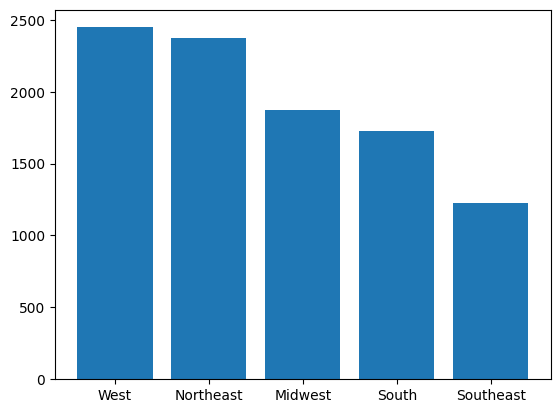

In [ ]:
# Número de registros p/ região
print(df['Region'].value_counts())
plt.bar(df['Region'].value_counts().index.values, df['Region'].value_counts())

Foot Locker      2637
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: Retailer, dtype: int64


<BarContainer object of 6 artists>

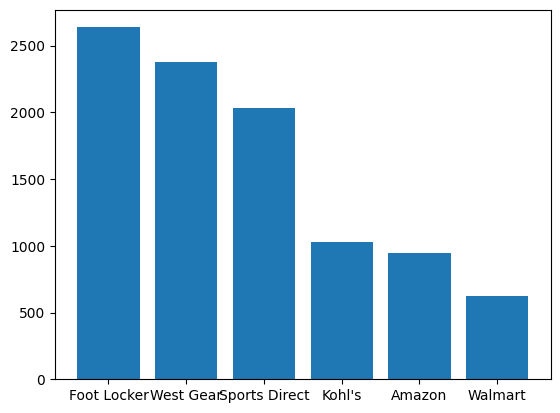

In [ ]:
# Número de registros p/ vendedor
print(df['Retailer'].value_counts())
plt.bar(df['Retailer'].value_counts().index.values, df['Retailer'].value_counts())

Online      4889
Outlet      3019
In-store    1740
Name: Sales Method, dtype: int64


<BarContainer object of 3 artists>

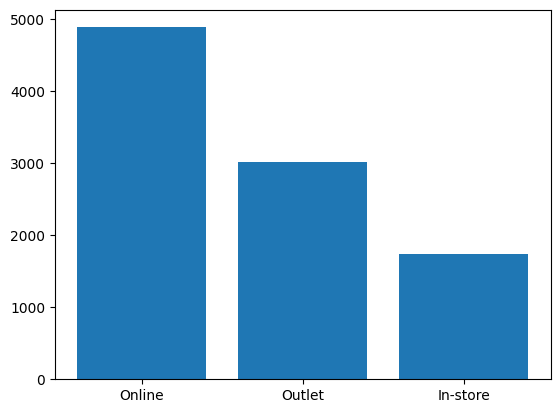

In [ ]:
# Número de registros p/ Metodo de venda
print(df['Sales Method'].value_counts())
plt.bar(df['Sales Method'].value_counts().index.values, df['Sales Method'].value_counts())

California        432
Texas             432
New York          360
Florida           360
Mississippi       216
Oregon            216
Louisiana         216
Idaho             216
New Mexico        216
Georgia           216
Arkansas          216
Virginia          216
Oklahoma          216
Connecticut       216
Rhode Island      216
Massachusetts     216
Vermont           216
Utah              216
Arizona           216
New Hampshire     216
Pennsylvania      216
Nevada            216
Alabama           216
Tennessee         216
South Dakota      144
Illinois          144
Colorado          144
New Jersey        144
Delaware          144
Maryland          144
West Virginia     144
Indiana           144
Wisconsin         144
Iowa              144
North Dakota      144
Michigan          144
Kansas            144
Missouri          144
Minnesota         144
Montana           144
Kentucky          144
Ohio              144
North Carolina    144
South Carolina    144
Nebraska          144
Maine     

<BarContainer object of 50 artists>

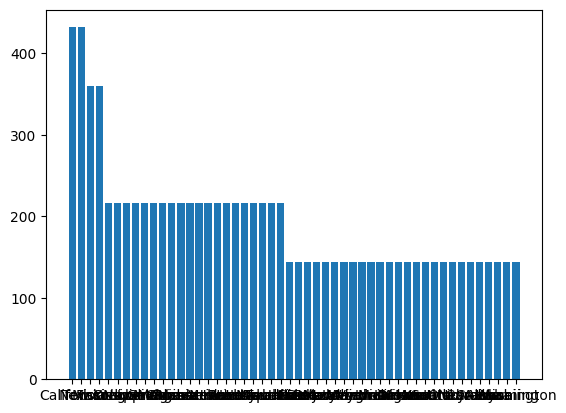

In [ ]:
# Número de registros p/ Estado
print(df['State'].value_counts())
plt.bar(df['State'].value_counts().index.values, df['State'].value_counts())

Portland          360
Charleston        288
Orlando           216
Salt Lake City    216
Houston           216
Boise             216
Phoenix           216
Albuquerque       216
Atlanta           216
New York          216
Jackson           216
Little Rock       216
Oklahoma City     216
Hartford          216
Providence        216
Boston            216
Burlington        216
Richmond          216
New Orleans       216
Manchester        216
Dallas            216
Philadelphia      216
Knoxville         216
Birmingham        216
Las Vegas         216
Los Angeles       216
San Francisco     216
Chicago           144
Newark            144
Baltimore         144
Indianapolis      144
Milwaukee         144
Des Moines        144
Fargo             144
Sioux Falls       144
Wichita           144
Wilmington        144
Honolulu          144
Albany            144
Louisville        144
Columbus          144
Charlotte         144
Seattle           144
Miami             144
Minneapolis       144
Billings  

<BarContainer object of 52 artists>

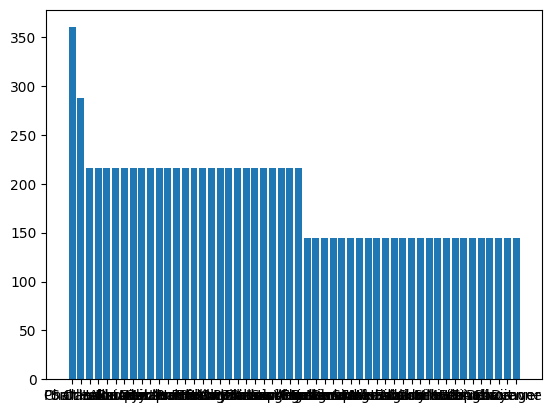

In [ ]:
# Número de registros p/ Cidade
print(df['City'].value_counts())
plt.bar(df['City'].value_counts().index.values, df['City'].value_counts())

0.35    1229
0.40    1003
0.30     700
0.50     610
0.45     364
        ... 
0.48       1
0.17       1
0.21       1
0.12       1
0.62       1
Name: Operating Margin, Length: 127, dtype: int64


3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,...,Operating Margin,Sales Method,Sales Class Arvore,Invoice Date TS,Region LB Encoder,State LB Encoder,City LB Encoder,Product LB Encoder,Sales Method LB Encoder,Sales Class Arvore LB Encoder


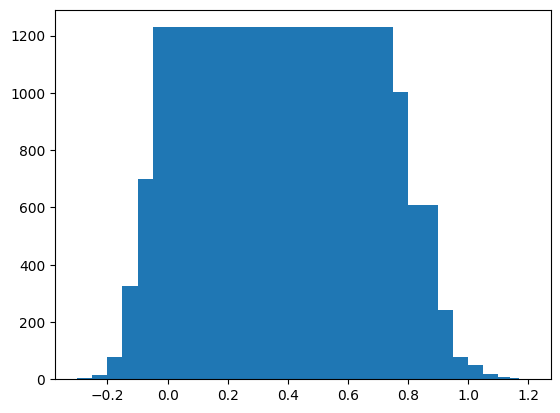

In [ ]:
# Numero de registros de cada margens de lucro
# df['Operating Margin'].value_counts().sort_index()

print(df['Operating Margin'].value_counts())
plt.bar(df['Operating Margin'].value_counts().index.values, df['Operating Margin'].value_counts())
df[df['Operating Margin'] < 0]

In [ ]:
import numpy as np # Raiz quadrada e calculos
import matplotlib.pyplot as plt # Desenhar matriz de confusão
#from datetime import datetime # para a conversão do datetime para time
from sklearn.preprocessing import LabelEncoder # Para codificar as "strings" em números

# Para Calcular erro médio quadrático (Bom para modelo de regressão) é especialmente útil quando se deseja penalizar erros grandes e outliers
from sklearn.metrics import mean_squared_error 

In [ ]:
# Desenhar a arvore bonitinho
def plot_tree(fitted_tree, feature_name, label_names):
  import graphviz
  from sklearn.tree import export_graphviz

  dot_data = export_graphviz(clf, out_file=None,
                             feature_names=feature_name,
                             class_names=label_names,
                             filled=True, rounded=True,
                             special_characters=True)
  
  graph = graphviz.Source(dot_data)
  return graph

Categorias

0. Muito Ruim (margem <=0.2)

1. Ruim (0.2 < margem <= 0.3)

2. Médio (0.3 < margem <= 0.45)

3. Bom (0.45 < margem <= 0.6)

4. Muito Bom (0.6 < margem)

Médio         4902
Bom           3040
Ruim          1163
Muito Bom      423
Muito Ruim     120
Name: Sales Class Arvore, dtype: int64


<BarContainer object of 5 artists>

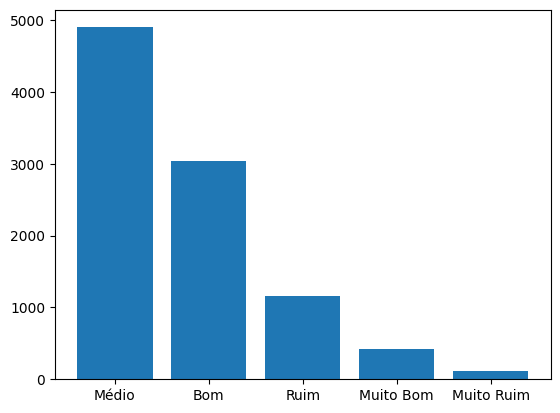

In [ ]:
# Valor das categorias a serem decididas
# 0. Muito Ruim (margem <=0.2)
# 1. Ruim (0.2 < margem <= 0.3)
# 2. Médio (0.3 < margem <= 0.45)
# 3. Bom (0.45 < margem <= 0.6)
# 4. Muito Bom (0.6 < margem)
df['Sales Class Arvore']=df['Operating Margin'].apply(lambda x: 'Muito Ruim' if x<=0.2 else
                                                                'Ruim'       if 0.2<x<=0.3 else
                                                                'Médio'      if 0.3<x<=0.45 else
                                                                'Bom'        if 0.45<x<=0.6 else
                                                                'Muito Bom')

# Imprimindo proporção dos resultados
print(df['Sales Class Arvore'].value_counts())
plt.bar(df['Sales Class Arvore'].value_counts().index.values, df['Sales Class Arvore'].value_counts())

In [ ]:
# A partir daqui precisamos converter as informações que utilizaremos em números inteiros ou ponto flutuante
df['Invoice Date TS']=df['Invoice Date'].apply(lambda x: x.timestamp()) # Converte DateTime pra timestamp(float64)

# Imprime os valores categóricos originais e os valores numéricos atribuídos
def imprimir_encoder(lb):
  print("\nRelação original-numérico: ")
  for i, valor in enumerate(lb.classes_):
      print("%s -> %d" % (valor, i))

# Utilizo LabelEncoder para codificar as Regioes, Estados, Cidades, Produtos, Metodos de Venda e Classificação final
# em números inteiros
lb = LabelEncoder()
df['Region LB Encoder']= lb.fit_transform(list(df['Region']))
df['State LB Encoder']= lb.fit_transform(list(df['State']))
df['City LB Encoder']= lb.fit_transform(list(df['City']))
df['Product LB Encoder']= lb.fit_transform(list(df['Product']))
df['Sales Method LB Encoder']= lb.fit_transform(list(df['Sales Method']))
df['Sales Class Arvore LB Encoder']= lb.fit_transform(list(df['Sales Class Arvore']))
imprimir_encoder(lb)

# Printa as informações novas do dataframe
df.iloc[:, -8:] # Pega as ultima 8 colunas adicionadas


Relação original-numérico: 
Bom -> 0
Muito Bom -> 1
Muito Ruim -> 2
Médio -> 3
Ruim -> 4


3,Invoice Date TS,Sales Class Arvore,Region LB Encoder,State LB Encoder,City LB Encoder,Product LB Encoder,Sales Method LB Encoder,Sales Class Arvore LB Encoder
4,1.577837e+09,Bom,1,31,35,2,0,0
5,1.577923e+09,Ruim,1,31,35,1,0,4
6,1.578010e+09,Médio,1,31,35,5,0,3
7,1.578096e+09,Médio,1,31,35,4,0,3
8,1.578182e+09,Ruim,1,31,35,0,0,4
...,...,...,...,...,...,...,...,...
9647,1.611446e+09,Ruim,1,28,30,0,2,4
9648,1.611446e+09,Médio,1,28,30,3,2,3
9649,1.613952e+09,Médio,1,28,30,2,2,3
9650,1.613952e+09,Médio,1,28,30,1,2,3


In [ ]:
# x_original é o que eu uso para classificar y_original, nele eu dropo tudo que não vou usar + a coluna da classificação final
x_original = df.drop(['Retailer','Invoice Date','Region','State','City','Product','Sales Method','Sales Class Arvore','Sales Class Arvore LB Encoder'], axis=1)

# y_original é o que será classificado
y_original = df['Sales Class Arvore LB Encoder']

print(x_original)
print(y_original)

3    Retailer ID Price per Unit Units Sold Total Sales Operating Profit  \
4        1185732             50       1200     60000.0          30000.0   
5        1185732             50       1000     50000.0          15000.0   
6        1185732             40       1000     40000.0          14000.0   
7        1185732             45        850     38250.0          13387.5   
8        1185732             60        900     54000.0          16200.0   
...          ...            ...        ...         ...              ...   
9647     1185732             50         64       320.0             89.6   
9648     1185732             41        105       430.5           137.76   
9649     1185732             41        184       754.4          279.128   
9650     1185732             42         70       294.0           123.48   
9651     1185732             29         83       240.7           64.989   

3    Operating Margin  Invoice Date TS  Region LB Encoder  State LB Encoder  \
4                 0.

In [ ]:
# Calculando o ganho de informação de cada atributo
from sklearn.feature_selection import mutual_info_classif

# Calcula a pontuação de informação mútua para cada atributo
mutual_info = mutual_info_classif(x_original, y_original)
lista_col = list(x_original.columns) # lista das colunas

# Imprime a pontuação de informação mútua para cada atributo
for i, score in enumerate(mutual_info):
    print("Atributo %s: %.2f" % (lista_col[i], score))


Atributo Retailer ID: 0.04
Atributo Price per Unit: 0.15
Atributo Units Sold: 0.16
Atributo Total Sales: 0.18
Atributo Operating Profit: 0.28
Atributo Operating Margin: 1.13
Atributo Invoice Date TS: 0.01
Atributo Region LB Encoder: 0.03
Atributo State LB Encoder: 0.14
Atributo City LB Encoder: 0.14
Atributo Product LB Encoder: 0.04
Atributo Sales Method LB Encoder: 0.11


In [ ]:
from sklearn.model_selection import train_test_split

# Realiza a divisão entre de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x_original, y_original, train_size = 0.7)

# Nomes das classes
target_names = ['Muito Ruim', 'Ruim', 'Médio','Bom','Muito Bom']

0.12044821302420966


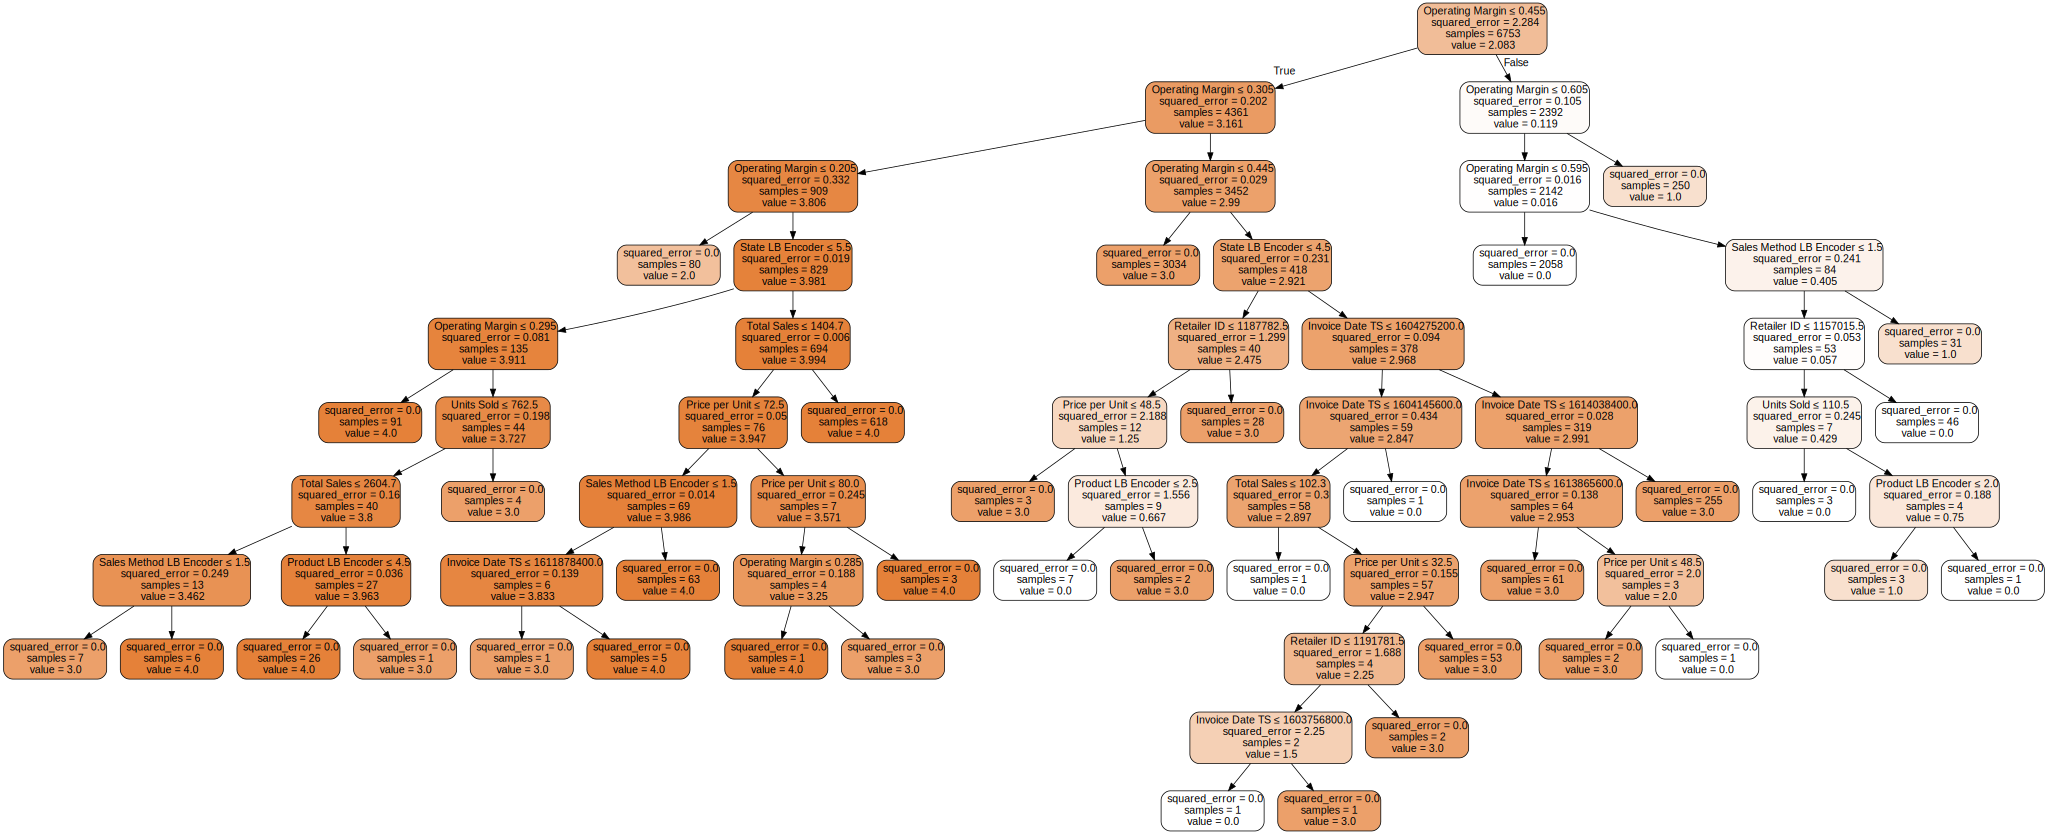

In [ ]:
from sklearn.tree import DecisionTreeRegressor # Biblioteca para implementação da arvore de regressão

# Implementação da arvore de regressão
clf = DecisionTreeRegressor(min_samples_leaf=1, random_state=0) # Com no minimo 11 folhas

# Faz o treinamento
clf.fit(x_train, y_train)

# Predizendo os dados de teste
p = clf.predict(x_test)

# Erro quadratico médio 
print(np.sqrt(mean_squared_error(y_test, p)))

# Desenha arvore de Regressão
plot_tree(clf, list(x_original), target_names)

Erro quadratico médio: 0.18304656485443435


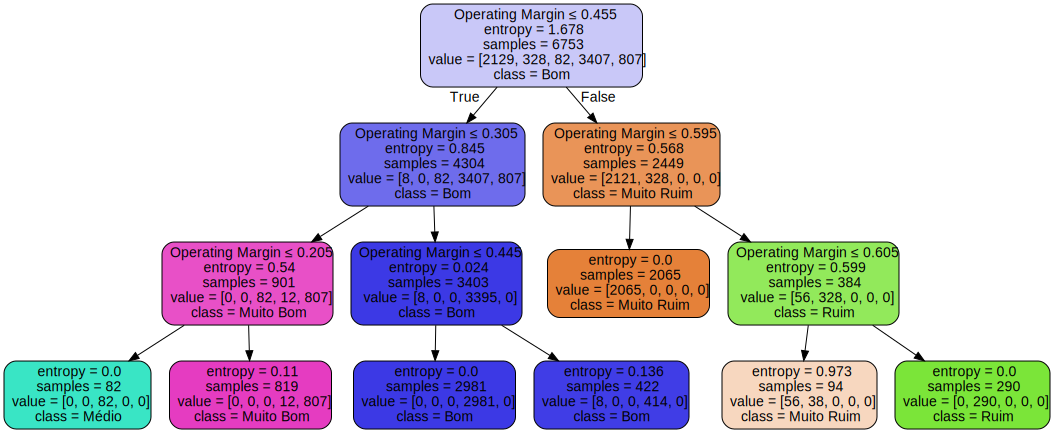

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Biblioteca para implementação da arvore de classificação

# Implementação da arvore de classificação por entropia com no maximo 3 niveis de profundidade
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=3) # max_leaf_nodes sendo 3 ou 4, outros valores não são bons

#  Faz o treinamento
clf = clf.fit(x_train, y_train)

# Predizendo os dados de teste
y_pred = clf.predict(x_test)

# Erro quadratico médio
print("Erro quadratico médio:",np.sqrt(mean_squared_error(y_test, y_pred)))

# Desenha Arvore de Classificação
plot_tree(clf, list(x_original), target_names)

In [ ]:
# Cross-Validation
from sklearn.model_selection import cross_val_score

lst = []
maximo = 0
minimo = 1
k_max, k_min = 0, 0
# Fazer K-folds com os seguintes valores
for cv in [3,5,7,10,12,15]:
  scores = cross_val_score(clf, x_original, y_original, cv=cv)
  lst.append(scores)
  print("K = %d Folds com %0.2f precisão com um desvio padrão de %0.2f" % (cv, scores.mean(), scores.std()))
  if maximo < np.max(scores):
    maximo =  np.max(scores)
    k_max = cv
  if minimo > np.min(scores):
    minimo = np.min(scores)
    k_min = cv

print("Maximo:", maximo, " com k =", k_max)
print("Minimo:", minimo, " com k =", k_min)
lst

K = 3 Folds com 0.99 precisão com um desvio padrão de 0.01
K = 5 Folds com 0.99 precisão com um desvio padrão de 0.01
K = 7 Folds com 0.99 precisão com um desvio padrão de 0.01
K = 10 Folds com 0.99 precisão com um desvio padrão de 0.01
K = 12 Folds com 0.99 precisão com um desvio padrão de 0.01
K = 15 Folds com 0.99 precisão com um desvio padrão de 0.01
Maximo: 1.0  com k = 10
Minimo: 0.9394409937888198  com k = 15


[array([0.98196517, 0.99564677, 0.99160448]),
 array([0.97409326, 0.97564767, 0.99326425, 0.9994816 , 0.98600311]),
 array([0.96446701, 0.99637418, 0.99709724, 0.99274311, 0.99709724,
        0.99927431, 0.98911466]),
 array([0.95440415, 0.99378238, 0.99481865, 0.99689119, 1.        ,
        0.9865285 , 0.99896373, 1.        , 0.99481328, 0.99377593]),
 array([0.94776119, 0.99004975, 0.99502488, 0.99502488, 1.        ,
        1.        , 0.98756219, 0.99502488, 1.        , 1.        ,
        0.99129353, 0.99502488]),
 array([0.93944099, 0.98757764, 0.99534161, 0.99377916, 0.99377916,
        1.        , 1.        , 0.98600311, 0.99377916, 0.99844479,
        1.        , 1.        , 0.99844479, 0.99066874, 0.99377916])]

In [ ]:
# Retornando a precisão média nos dados e rótulos de teste fornecidos.
clf.score(x_test, y_test)

0.9913644214162349

In [ ]:
# Agora vamos testar a acuracia
from sklearn.metrics import accuracy_score

# Mostra a acuracia consideração a predição do teste e os valores do teste
accuracy_score(y_test, y_pred)

0.9913644214162349

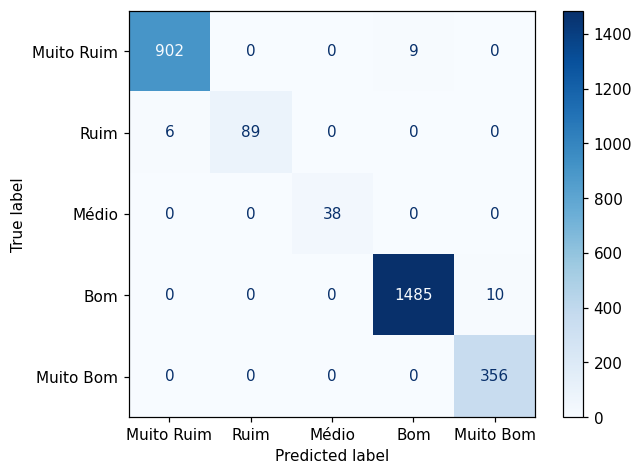

In [ ]:
# Vamos desenhar e mostrar a matrix de confusão
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Cria a figura e os eixos
fig, ax = plt.subplots(dpi = 110)

# y_pred já foi calculado, então basta fazer a matriz
cm = confusion_matrix(y_test, y_pred)

# Cria a classe com a matriz de confusão e os nomes das classes
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

# Desenha a matriz
disp.plot(cmap=plt.cm.Blues, ax=ax) 

#NAIVE BAYES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# desativar os warnings que ocorrem quando eu crio uma nova coluna no dataframe
pd.options.mode.chained_assignment = None  # default='warn'

# Selecionando apenas as colunas que eu acho importante
# Retailer ID e Units Sold eu não uso aqui
X_Atributos = df.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8, 11, 12]]
X_Atributos.index -= 4

# Atributos que serão usados para gerar previsões de classes de lucro ['Muito Bom', 'Bom', 'Médio', 'Ruim', 'Muito Ruim']
X_Atributos

3,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Operating Margin,Sales Method
0,Foot Locker,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,0.5,In-store
1,Foot Locker,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,0.3,In-store
2,Foot Locker,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,0.35,In-store
3,Foot Locker,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,0.35,In-store
4,Foot Locker,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,0.3,In-store
...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,0.28,Outlet
9644,Foot Locker,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,0.32,Outlet
9645,Foot Locker,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,0.37,Outlet
9646,Foot Locker,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,0.42,Outlet


Foot Locker      2637
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: Retailer, dtype: int64


<BarContainer object of 6 artists>

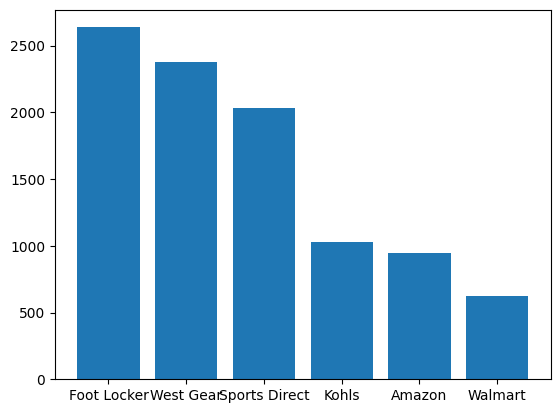

In [ ]:
# Distribuição de Varejistas
print(X_Atributos['Retailer'].value_counts())

plt.bar(['Foot Locker', 'West Gear', 'Sports Direct', 'Kohls', 'Amazon', 'Walmart'], X_Atributos['Retailer'].value_counts())

Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1606
Name: Product, dtype: int64


<BarContainer object of 6 artists>

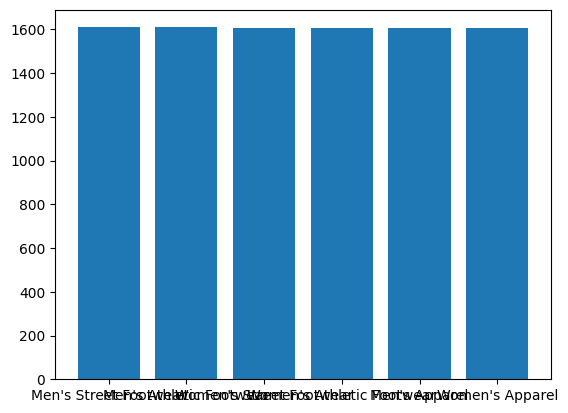

In [ ]:
print(X_Atributos['Product'].value_counts())

plt.bar(X_Atributos['Product'].unique(), X_Atributos['Product'].value_counts())

In [ ]:
# Separando as classes (variável que queremos prever) dos outros atributos
# Criando dataframe vazio do tamanho de uma das colunas de X_Atributos
Y_Atributos = pd.DataFrame(columns = ['Sales Class'], index = range(len(X_Atributos)), dtype=str)

# Preenchendo com valor 'Muito Bom'
Y_Atributos['Sales Class'] = 'Muito Bom'

# Não sei como uasr for implícito nesse caso aqui (não sou python dev)
# Verificando cada margem de lucro (Coluna Operating Margin), dependendo
#     do intervalo que o valor estiver, uma classe específica será atribuída ao registro
for i in range(len(X_Atributos)):
  margem_lucro = float(X_Atributos.iloc[i, 8])
  if margem_lucro <= 0.2:
    Y_Atributos.iloc[i, 0] = 'Muito Ruim'
  elif 0.2 < margem_lucro and margem_lucro <= 0.3:
    Y_Atributos.iloc[i, 0] = 'Ruim'
  elif 0.3 < margem_lucro and margem_lucro <= 0.45:
    Y_Atributos.iloc[i, 0] = 'Médio'
  elif 0.45 < margem_lucro and margem_lucro <= 0.6:
    Y_Atributos.iloc[i, 0] = 'Bom'

# Classes de lucro ['Muito Bom', 'Bom', 'Médio', 'Ruim', 'Muito Ruim']
Y_Atributos

,Sales Class
0,Bom
1,Ruim
2,Médio
3,Médio
4,Ruim
...,...
9643,Ruim
9644,Médio
9645,Médio
9646,Médio


Médio         4902
Bom           3040
Ruim          1163
Muito Bom      423
Muito Ruim     120
Name: Sales Class, dtype: int64


<BarContainer object of 5 artists>

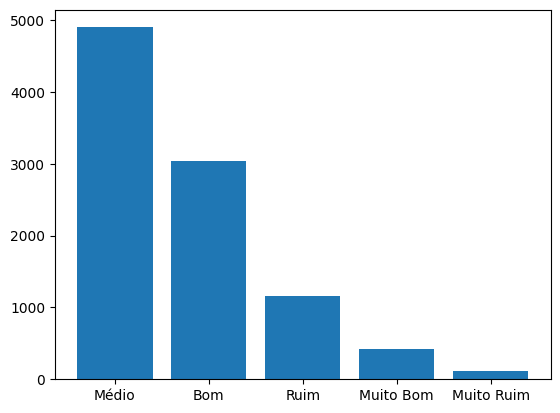

In [ ]:
# Quantidade de registros com cada classe de lucro
print(Y_Atributos['Sales Class'].value_counts())

plt.bar(['Médio', 'Bom', 'Ruim', 'Muito Bom', 'Muito Ruim'], Y_Atributos['Sales Class'].value_counts())

Médio         50.808458
Bom           31.509121
Ruim          12.054312
Muito Bom      4.384328
Muito Ruim     1.243781
Name: Sales Class, dtype: float64


<BarContainer object of 5 artists>

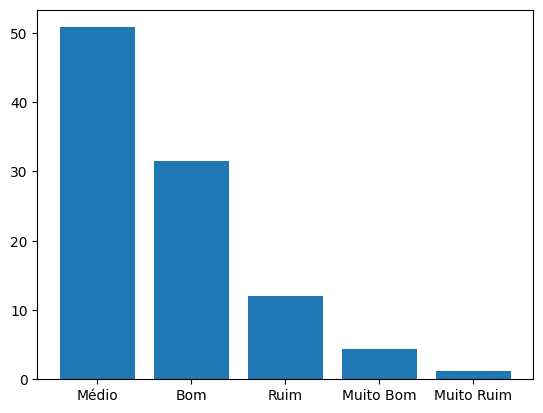

In [ ]:
# Quantidade de registros com cada classe de lucro (em porcentagem)
print(Y_Atributos['Sales Class'].value_counts(normalize = True) * 100)

plt.bar(['Médio', 'Bom', 'Ruim', 'Muito Bom', 'Muito Ruim'], Y_Atributos['Sales Class'].value_counts(normalize = True) * 100)

In [ ]:
# Será utilizado o Naive Bayes Gaussiano
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Eu tive que usar esses labels encoders para tranformar strings e datas em valores numéricos,
#     parece que a função fit() para o treinamento da IA não aceita valores não numéricos
retailerLabelEncoder = LabelEncoder()
invoiceDateLabelEncoder = LabelEncoder()
regionLabelEncoder = LabelEncoder()
stateLabelEncoder = LabelEncoder()
cityLabelEncoder = LabelEncoder()
productLabelEncoder = LabelEncoder()
salesMethodLabelEncoder = LabelEncoder()
X_Atributos.iloc[:,0] = retailerLabelEncoder.fit_transform(X_Atributos.iloc[:,0])
X_Atributos.iloc[:,1] = invoiceDateLabelEncoder.fit_transform(X_Atributos.iloc[:,1])
X_Atributos.iloc[:,2] = regionLabelEncoder.fit_transform(X_Atributos.iloc[:,2])
X_Atributos.iloc[:,3] = stateLabelEncoder.fit_transform(X_Atributos.iloc[:,3])
X_Atributos.iloc[:,4] = cityLabelEncoder.fit_transform(X_Atributos.iloc[:,4])
X_Atributos.iloc[:,5] = productLabelEncoder.fit_transform(X_Atributos.iloc[:,5])
X_Atributos.iloc[:,9] = salesMethodLabelEncoder.fit_transform(X_Atributos.iloc[:,9])

pd.DataFrame(X_Atributos, columns = ['Retailer', 'Invoice Date',	'Region', 'State', 'City',	'Product',	'Price per Unit',	'Units Sold',	'Operating Margin', 'Sales Method'])

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Operating Margin,Sales Method
0,1,0,1,31,35,2,50,1200,0.5,0
1,1,1,1,31,35,1,50,1000,0.3,0
2,1,2,1,31,35,5,40,1000,0.35,0
3,1,3,1,31,35,4,45,850,0.35,0
4,1,4,1,31,35,0,60,900,0.3,0
...,...,...,...,...,...,...,...,...,...,...
9643,1,382,1,28,30,0,50,64,0.28,2
9644,1,382,1,28,30,3,41,105,0.32,2
9645,1,411,1,28,30,2,41,184,0.37,2
9646,1,411,1,28,30,1,42,70,0.42,2


<Axes: xlabel='3', ylabel='3'>

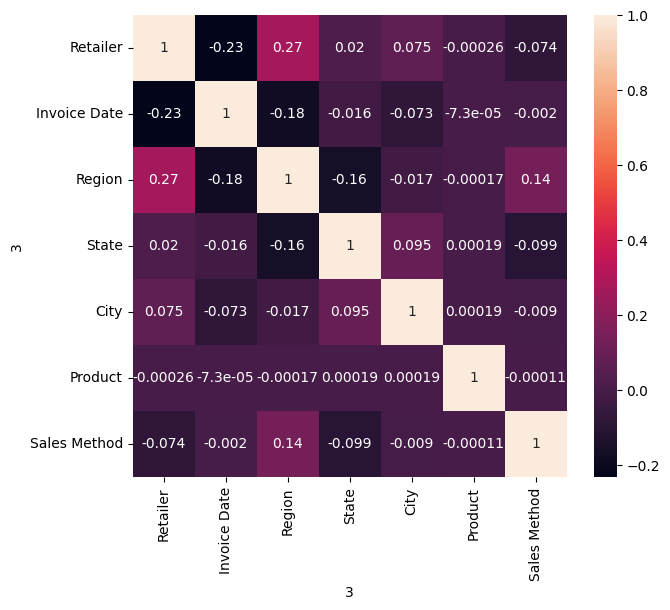

In [ ]:
# Correlação entre atributos de X_Atributos e Y_Atributos
import seaborn as sns

# Concatenando tabelas X_Atributos e Y_Atributos
tabelaConcat = (pd.DataFrame(X_Atributos)).copy()
tabelaConcat['Sales Class'] = (pd.DataFrame(Y_Atributos)).copy()

plt.figure(figsize=(7, 6))
sns.heatmap(tabelaConcat.corr(), annot=True)

In [ ]:
# Criação do modelo e configuração de Cross Validation
ClassificadorGaussNB = GaussianNB()

melhorK = -1
piorK = -1
melhorScore = 0
piorScore = 1

# Teste de predição com diferentes valores de K para cross validation
for i in [3,5,7,10,12,15]:
  scores = cross_val_score(ClassificadorGaussNB, X_Atributos, np.ravel(Y_Atributos), cv=i, scoring="accuracy")
  mediaScores = scores.mean()
  if melhorScore < mediaScores:
    melhorScore = mediaScores
    melhorK = i
  if piorScore > mediaScores:
    piorScore = mediaScores
    piorK = i

# Imprimindo melhores e piores resultados
print("Melhor acurácia =", melhorScore*100, "com k =", melhorK)
print("Pior acurácia   =", piorScore*100, "com k =", piorK)


ValueError: ignored

#SUPORT VECTOR MACHINE(SVM)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm

df_svm = df
dataset = df_svm #.copy()

dataset.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object', name=3)

In [ ]:
# Valor das categorias a serem decididas
# 0. Muito Ruim (margem <=0.2)
# 1. Ruim (0.2 < margem <= 0.3)
# 2. Médio (0.3 < margem <= 0.45)
# 3. Bom (0.45 < margem <= 0.6)
# 4. Muito Bom (0.6 < margem)
dataset['Sales Class SVM']=dataset['Operating Margin'].apply(lambda x: 'Muito Ruim' if x<=0.2 else
                                                                'Ruim'       if 0.2<x<=0.3 else
                                                                'Médio'      if 0.3<x<=0.45 else
                                                                'Bom'        if 0.45<x<=0.6 else
                                                                'Muito Bom')
print(dataset['Sales Class SVM'].value_counts())
dataset

Médio         4902
Bom           3040
Ruim          1163
Muito Bom      423
Muito Ruim     120
Name: Sales Class SVM, dtype: int64


3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Sales Class SVM
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,60000.0,30000.0,0.5,In-store,Bom
5,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,50000.0,15000.0,0.3,In-store,Ruim
6,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,40000.0,14000.0,0.35,In-store,Médio
7,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,38250.0,13387.5,0.35,In-store,Médio
8,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,54000.0,16200.0,0.3,In-store,Ruim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,320.0,89.6,0.28,Outlet,Ruim
9648,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,430.5,137.76,0.32,Outlet,Médio
9649,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,754.4,279.128,0.37,Outlet,Médio
9650,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,294.0,123.48,0.42,Outlet,Médio


In [ ]:
dataset.index -= 4
ClasseY = dataset["Sales Class SVM"]
dataset.drop(["Operating Margin", "Total Sales", "Retailer ID", "Sales Class SVM"], axis= 1, inplace = True)
ClasseY.value_counts()

Médio         4902
Bom           3040
Ruim          1163
Muito Bom      423
Muito Ruim     120
Name: Sales Class SVM, dtype: int64

In [ ]:
dataset

3,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Operating Profit,Sales Method
0,Foot Locker,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,30000.0,In-store
1,Foot Locker,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,15000.0,In-store
2,Foot Locker,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,14000.0,In-store
3,Foot Locker,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,13387.5,In-store
4,Foot Locker,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,16200.0,In-store
...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,89.6,Outlet
9644,Foot Locker,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,137.76,Outlet
9645,Foot Locker,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,279.128,Outlet
9646,Foot Locker,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,123.48,Outlet


Médio         4902
Bom           3040
Ruim          1163
Muito Bom      423
Muito Ruim     120
Name: Sales Class SVM, dtype: int64


<BarContainer object of 5 artists>

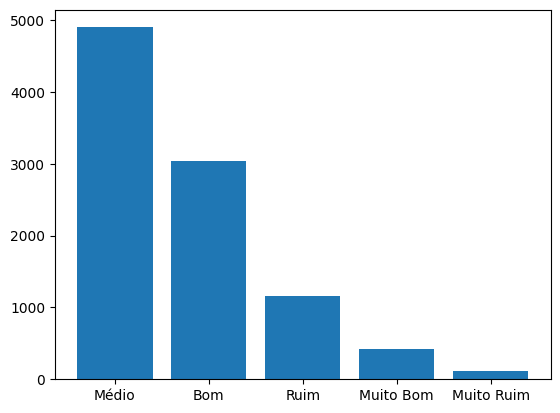

In [ ]:
import matplotlib.pyplot as plt
# Quantidade de registros com cada classe de lucro
print(ClasseY.value_counts())

plt.bar(['Médio', 'Bom', 'Ruim', 'Muito Bom', 'Muito Ruim'], ClasseY.value_counts())

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Como é necessário que os atributos para o cross validation sejam númericos, é necessário transformar todos os valores não numéricos
retailerLabelEncoder = LabelEncoder()
invoiceDateLabelEncoder = LabelEncoder()
regionLabelEncoder = LabelEncoder()
stateLabelEncoder = LabelEncoder()
cityLabelEncoder = LabelEncoder()
productLabelEncoder = LabelEncoder()
salesMethodLabelEncoder = LabelEncoder()
dataset["Retailer"] = retailerLabelEncoder.fit_transform(dataset["Retailer"])
dataset["Invoice Date"] = invoiceDateLabelEncoder.fit_transform(dataset["Invoice Date"])
dataset["Region"] = regionLabelEncoder.fit_transform(dataset["Region"])
dataset["State"] = stateLabelEncoder.fit_transform(dataset["State"])
dataset["City"] = cityLabelEncoder.fit_transform(dataset["City"])
dataset["Product"] = productLabelEncoder.fit_transform(dataset["Product"])
dataset["Sales Method"] = salesMethodLabelEncoder.fit_transform(dataset["Sales Method"])

pd.DataFrame(dataset, columns = ['Retailer', 'Invoice Date',	'Region', 'State', 'City',	'Product',	'Price per Unit',	'Units Sold',	'Operating Profit', 'Sales Method']) # modifica os valores do dataset original

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Operating Profit,Sales Method
0,1,0,1,31,35,2,50,1200,30000.0,0
1,1,1,1,31,35,1,50,1000,15000.0,0
2,1,2,1,31,35,5,40,1000,14000.0,0
3,1,3,1,31,35,4,45,850,13387.5,0
4,1,4,1,31,35,0,60,900,16200.0,0
...,...,...,...,...,...,...,...,...,...,...
9643,1,382,1,28,30,0,50,64,89.6,2
9644,1,382,1,28,30,3,41,105,137.76,2
9645,1,411,1,28,30,2,41,184,279.128,2
9646,1,411,1,28,30,1,42,70,123.48,2


<Axes: xlabel='3', ylabel='3'>

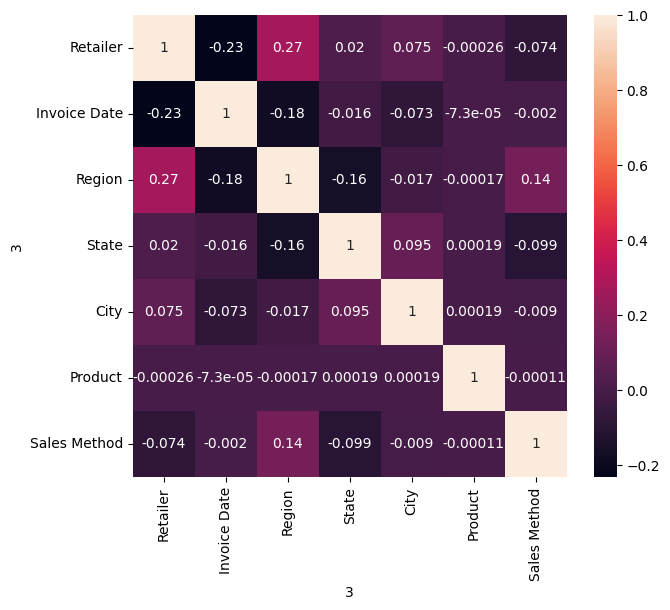

In [ ]:
import matplotlib.pyplot as plt
# Correlação entre atributos de X_Atributos e Y_Atributos
import seaborn as sns

# Concatenando tabelas X_Atributos e Y_Atributos
tabelaHeat = (pd.DataFrame(dataset)).copy()
tabelaHeat['Sales Class'] = (pd.DataFrame(ClasseY)).copy()

plt.figure(figsize=(7, 6))
sns.heatmap(tabelaHeat.corr(), annot=True)

In [ ]:
from sklearn.model_selection import ShuffleSplit # utilizado para personalizar o cross validation
# Criação do modelo e configuração de Cross Validation
supportVector = svm.SVC(kernel='sigmoid', C=1, random_state=42)

melhorK = -1
piorK = -1
melhorScore = 0
piorScore = 1

# Teste de predição com diferentes valores de K para cross validation
for i in [3,5,7,10,12,15]:
  crossSettings = ShuffleSplit(n_splits=i, test_size=0.3, random_state=0)
  scores = cross_val_score(supportVector, dataset, np.ravel(ClasseY), cv=crossSettings, scoring="accuracy")
  mediaScores = scores.mean()
  if melhorScore < mediaScores:
    melhorScore = mediaScores
    melhorK = i
  if piorScore > mediaScores:
    piorScore = mediaScores
    piorK = i
  if i == 3:
    fold3 = mediaScores
  if i == 5:
    fold5 = mediaScores
  if i == 7:
    fold7 = mediaScores
  if i == 10:
    fold10 = mediaScores
  if i == 12:
    fold12 = mediaScores
  if i == 15:
    fold15 = mediaScores

# Imprimindo melhores e piores resultados
print("Melhor acurácia =", melhorScore*100, "com k folds=", melhorK)
print("Pior acurácia   =", piorScore*100, "com k folds=", piorK)
print("Acurácia 3 folds   =", fold3*100)
print("Acurácia 5 folds   =", fold5*100)
print("Acurácia 7 folds   =", fold7*100)
print("Acurácia 10 folds   =", fold10*100)
print("Acurácia 12 folds   =", fold12*100)
print("Acurácia 15 folds   =", fold15*100)

Melhor acurácia = 44.72078295912493 com k folds= 3
Pior acurácia   = 43.44929681717247 com k folds= 7
Acurácia 3 folds   = 44.72078295912493
Acurácia 5 folds   = 44.359240069084635
Acurácia 7 folds   = 43.44929681717247
Acurácia 10 folds   = 43.78929188255613
Acurácia 12 folds   = 44.0587219343696
Acurácia 15 folds   = 44.50201496833621
